In [4]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime

In [5]:
#loading the dataset and creating dataframe
df=pd.read_csv('hr-data (1).csv')
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
0,Barr Faughny,AC0001,Male,Bachelor's Degree,12-Jun-20,Chocolatier,51300,26.0,13
1,Dennison Crosswaite,AC0002,Female,Diploma,18-Feb-21,Production Operator,38300,32.7,12
2,Gunar Cockshoot,AC0003,Male,High School Diploma,05-Sep-22,Packaging Associate,31400,34.3,16
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,20-Nov-19,Marketing Specialist,60700,29.6,21
4,Gigi Bohling,AC0005,Male,Master's Degree,08-Apr-18,Research Scientist,77300,30.3,23


In [6]:
df.columns

Index(['Name', 'Emp ID', 'Gender', 'Education Qualification', 'Date of Join',
       'Job Title', 'Salary', 'Age', 'Leave Balance'],
      dtype='object')

In [7]:
df.shape

(161, 9)

In [8]:
# Multiplying 'Exchange Rate' with average column for two for the converted cost
df['Salary (INR)'] = df['Salary'] * 83.47

In [9]:
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Salary (INR)
0,Barr Faughny,AC0001,Male,Bachelor's Degree,12-Jun-20,Chocolatier,51300,26.0,13,4282011.0
1,Dennison Crosswaite,AC0002,Female,Diploma,18-Feb-21,Production Operator,38300,32.7,12,3196901.0
2,Gunar Cockshoot,AC0003,Male,High School Diploma,05-Sep-22,Packaging Associate,31400,34.3,16,2620958.0
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,20-Nov-19,Marketing Specialist,60700,29.6,21,5066629.0
4,Gigi Bohling,AC0005,Male,Master's Degree,08-Apr-18,Research Scientist,77300,30.3,23,6452231.0


In [10]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     161 non-null    object 
 1   Emp ID                   161 non-null    object 
 2   Gender                   161 non-null    object 
 3   Education Qualification  161 non-null    object 
 4   Date of Join             161 non-null    object 
 5   Job Title                161 non-null    object 
 6   Salary                   161 non-null    int64  
 7   Age                      161 non-null    float64
 8   Leave Balance            161 non-null    int64  
 9   Salary (INR)             161 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 12.7+ KB


In [11]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

Name                       0
Emp ID                     0
Gender                     0
Education Qualification    0
Date of Join               0
Job Title                  0
Salary                     0
Age                        0
Leave Balance              0
Salary (INR)               0
dtype: int64

In [12]:
#Check for duplicate data
duplicate_data=df.duplicated().any()
print(duplicate_data)

False


In [13]:
#To give stastical information about the dataset
df[['Age', 'Leave Balance', 'Salary (INR)']].describe()

,Age,Leave Balance,Salary (INR)
count,161.000000,161.000000,1.610000e+02
mean,35.204969,16.416149,4.526666e+06
std,8.602309,4.980661,1.388574e+06
min,23.500000,2.000000,2.412283e+06
25%,30.700000,14.000000,3.313759e+06
50%,32.700000,16.000000,4.265317e+06
75%,35.900000,20.000000,5.909676e+06
max,66.700000,37.000000,7.094950e+06


<Figure size 1400x1200 with 0 Axes>

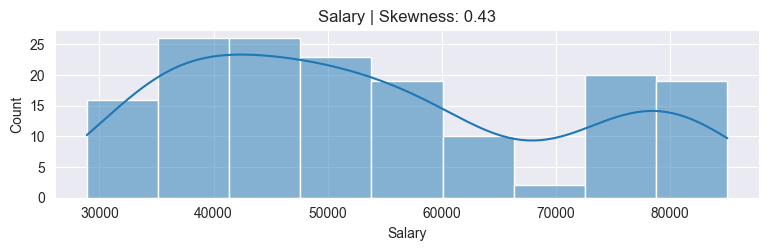

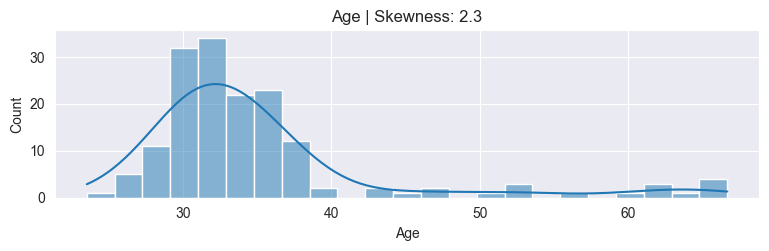

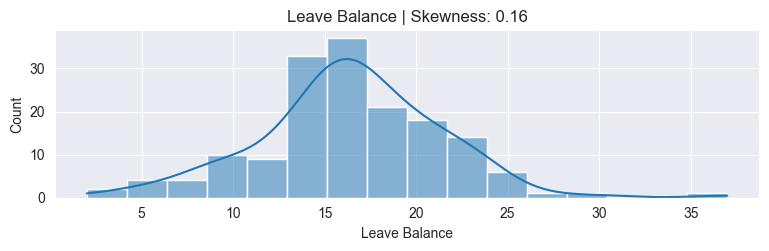

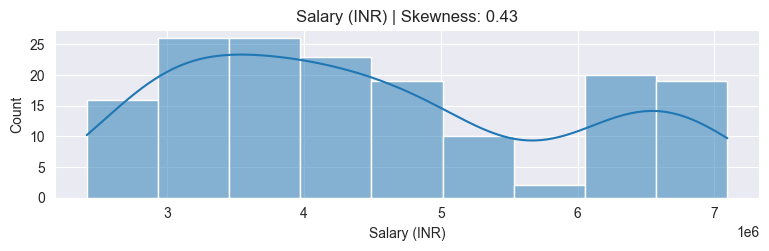

In [14]:
#To check for the distribution of data
# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.figure(figsize=(20,10))
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.show() 

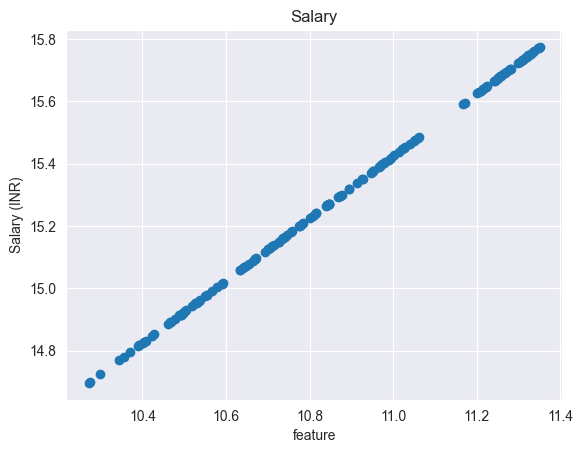

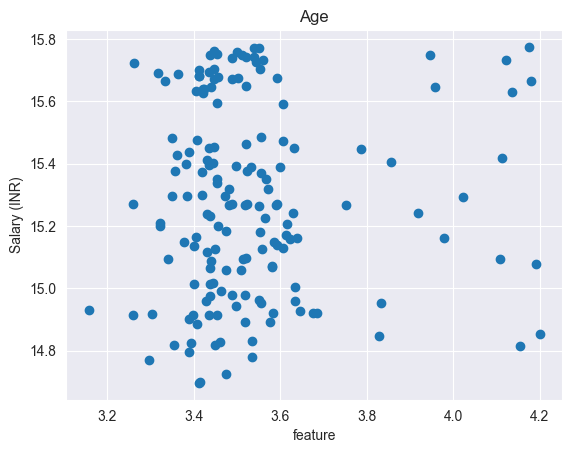

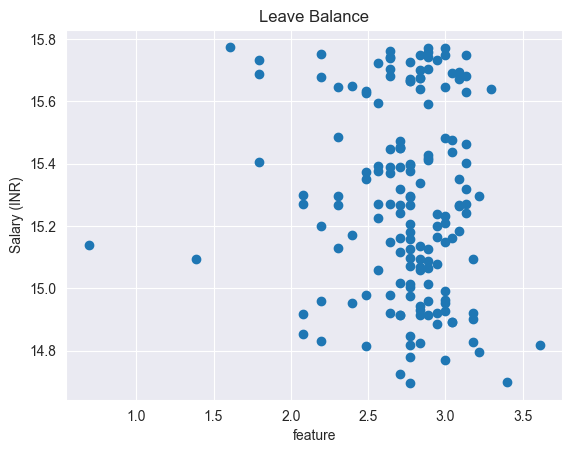

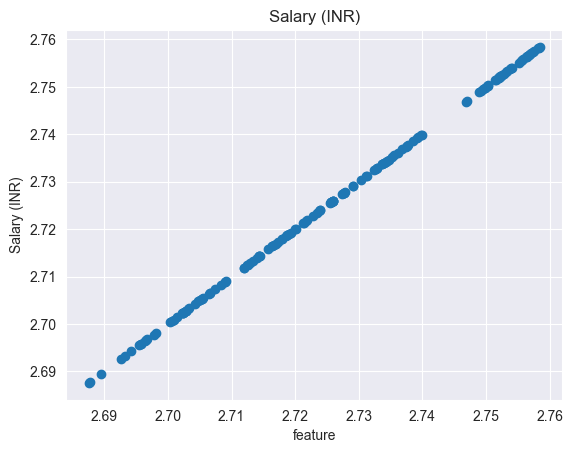

In [15]:
#logarithmic transformation
for feature in numerical_columns:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['Salary (INR)']=np.log(data['Salary (INR)'])
    plt.scatter(data[feature], data['Salary (INR)'])
    plt.xlabel('feature')
    plt.ylabel('Salary (INR)')
    plt.title(feature)
    plt.show()

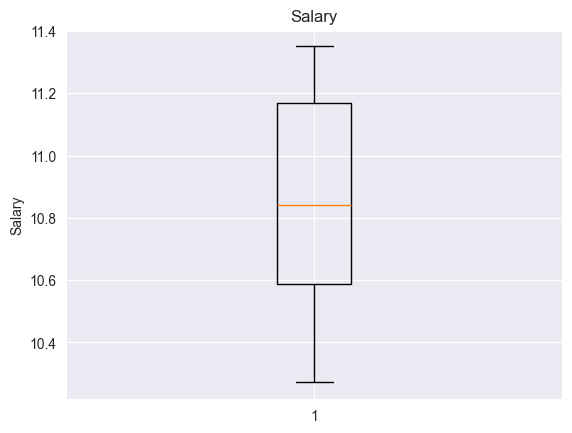

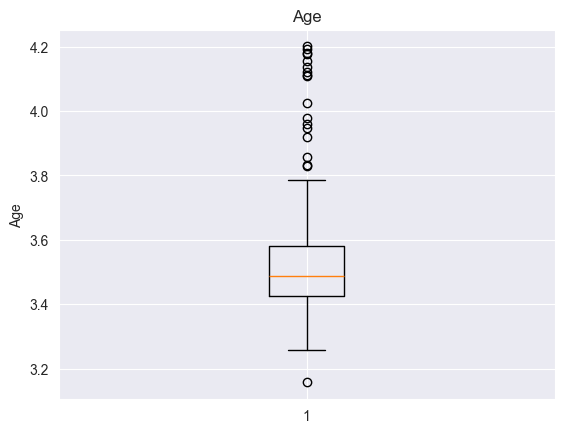

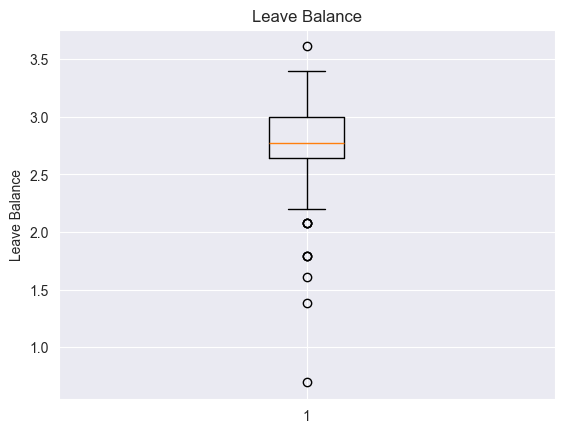

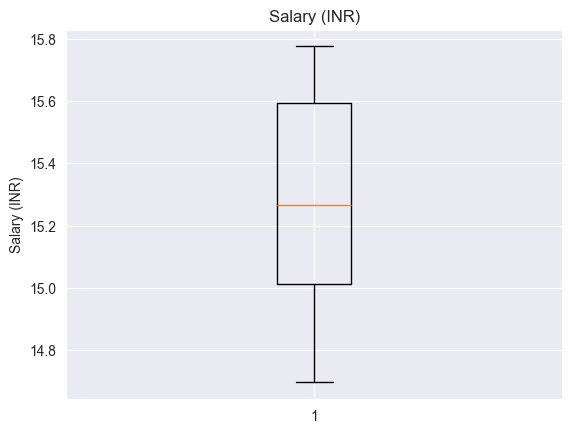

In [16]:
#outliers
for feature in numerical_columns:
    data=df.copy()
    data[feature]=np.log(data[feature])
    plt.boxplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

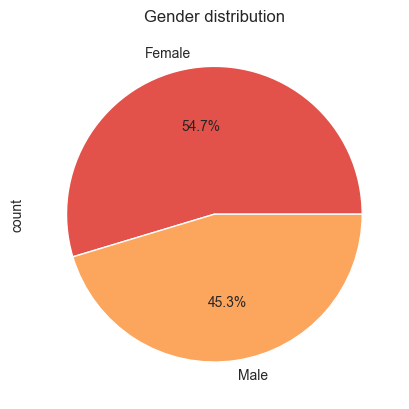

In [17]:
#Gender distribution
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Spectral"))
plt.title('Gender distribution')
plt.show()

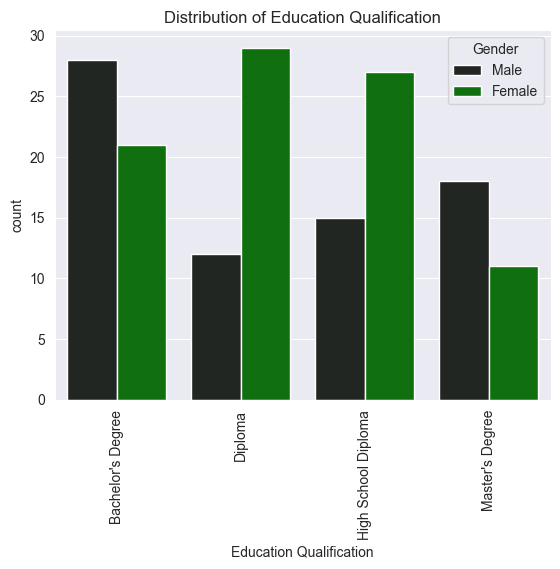

In [18]:
#Distribution of education 
sns.countplot(x='Education Qualification', data=df, hue='Gender', color='g')
plt.xticks(rotation=90)
plt.title('Distribution of Education Qualification')
plt.show()

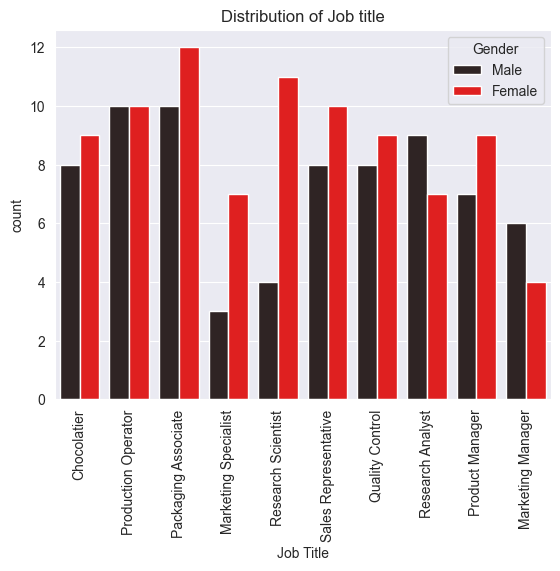

In [19]:
#Distribution of Job title
sns.countplot(x='Job Title', hue='Gender', data=df, color='r')
plt.xticks(rotation=90)
plt.title('Distribution of Job title')
plt.show()

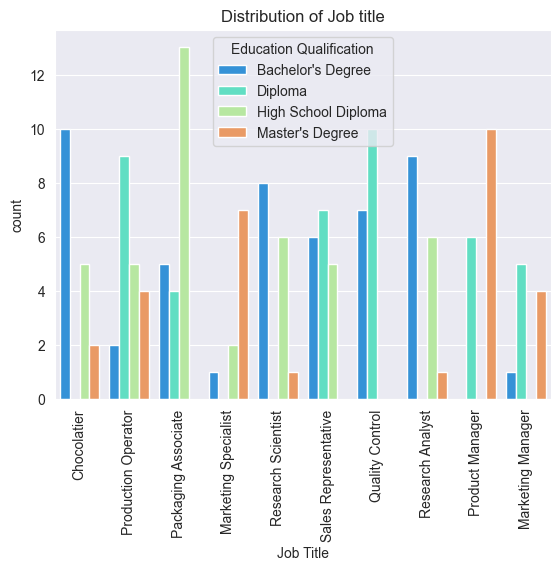

In [20]:
#Distribution of Job title
sns.countplot(x='Job Title', hue='Education Qualification', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Distribution of Job title')
plt.show()

Text(0.5, 1.0, 'High paid roles')

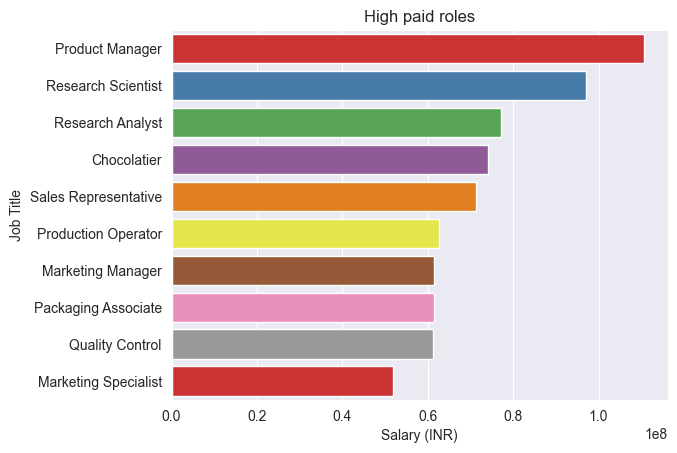

In [21]:
#High paid roles
Salary=df.groupby("Job Title")["Salary (INR)"].sum().reset_index()
Salary=Salary.sort_values(by="Salary (INR)",ascending=False)
sns.barplot(x="Salary (INR)",y="Job Title",palette='Set1', data=Salary[:10])
plt.title("High paid roles")

Text(0.5, 1.0, 'Salary vs Educational qualification')

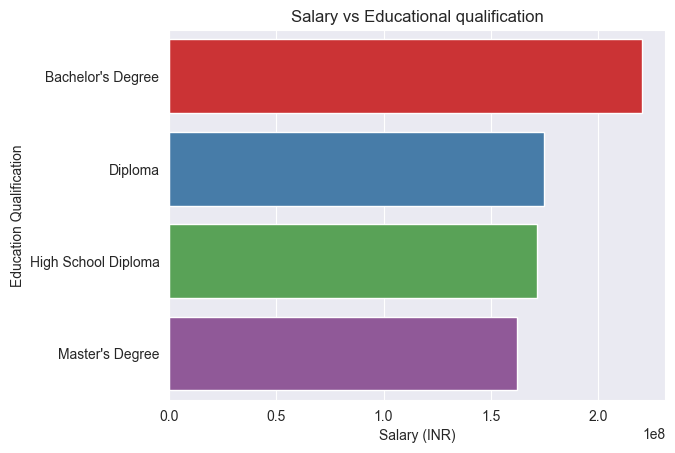

In [22]:
#Salary vs Educational qualification
Salary=df.groupby("Education Qualification")["Salary (INR)"].sum().reset_index()
Salary=Salary.sort_values(by="Salary (INR)",ascending=False)
sns.barplot(x="Salary (INR)",y="Education Qualification",palette='Set1', data=Salary)
plt.title("Salary vs Educational qualification")

Text(0.5, 1.0, 'Salary vs Gender')

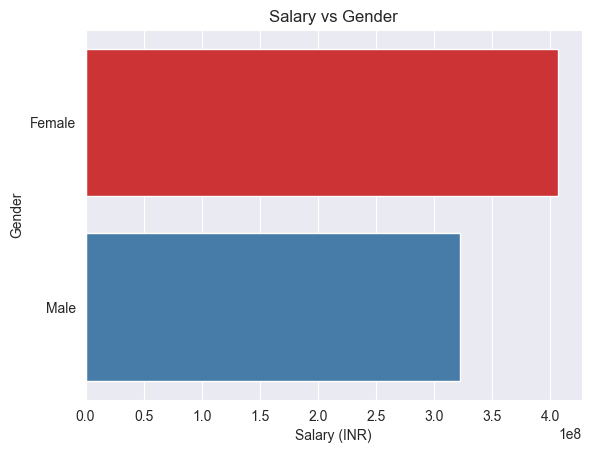

In [23]:
#Salary vs Gender
Salary=df.groupby("Gender")["Salary (INR)"].sum().reset_index()
Salary=Salary.sort_values(by="Salary (INR)",ascending=False)
sns.barplot(x="Salary (INR)",y="Gender",palette='Set1', data=Salary)
plt.title("Salary vs Gender")

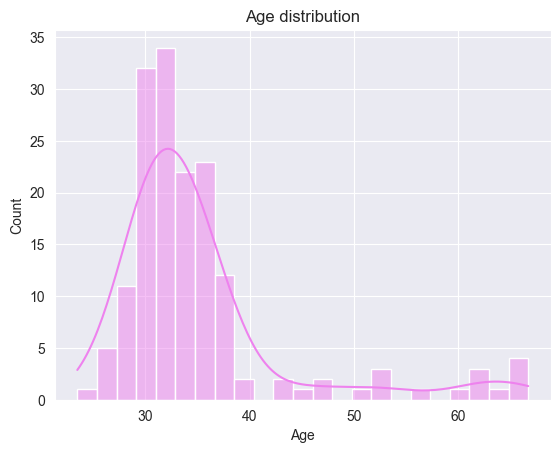

In [24]:
#Age distribution
sns.histplot(df['Age'],kde=True, color='violet')
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

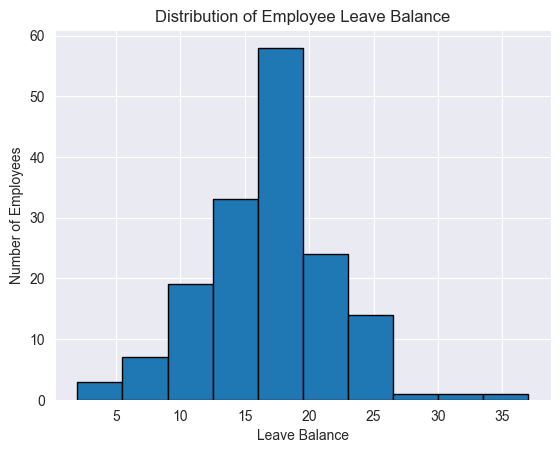

In [25]:
# Distribution of leave balance
plt.hist(data['Leave Balance'], bins=10, edgecolor='black')
plt.xlabel('Leave Balance')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Leave Balance')
plt.show()

In [26]:

# Extract year and month
df['year'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y').dt.year
df['month'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y').dt.month

print(df)

                    Name  Emp ID  Gender Education Qualification Date of Join  \
0           Barr Faughny  AC0001    Male       Bachelor's Degree    12-Jun-20   
1    Dennison Crosswaite  AC0002  Female                 Diploma    18-Feb-21   
2        Gunar Cockshoot  AC0003    Male     High School Diploma    05-Sep-22   
3         Wilone O'Kielt  AC0004  Female       Bachelor's Degree    20-Nov-19   
4           Gigi Bohling  AC0005    Male         Master's Degree    08-Apr-18   
..                   ...     ...     ...                     ...          ...   
156      Michael Walkson  AC0157    Male         Master's Degree    26-Nov-17   
157        Anaya Agarwal  AC0158  Female     High School Diploma    09-Apr-23   
158          Krish Rawat  AC0159    Male                 Diploma    02-Jun-20   
159          Siya Sharma  AC0160  Female       Bachelor's Degree    26-Aug-19   
160        Kabir Trivedi  AC0161    Male     High School Diploma    19-Mar-22   

                Job Title  

In [27]:
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Salary (INR),year,month
0,Barr Faughny,AC0001,Male,Bachelor's Degree,12-Jun-20,Chocolatier,51300,26.0,13,4282011.0,2020,6
1,Dennison Crosswaite,AC0002,Female,Diploma,18-Feb-21,Production Operator,38300,32.7,12,3196901.0,2021,2
2,Gunar Cockshoot,AC0003,Male,High School Diploma,05-Sep-22,Packaging Associate,31400,34.3,16,2620958.0,2022,9
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,20-Nov-19,Marketing Specialist,60700,29.6,21,5066629.0,2019,11
4,Gigi Bohling,AC0005,Male,Master's Degree,08-Apr-18,Research Scientist,77300,30.3,23,6452231.0,2018,4


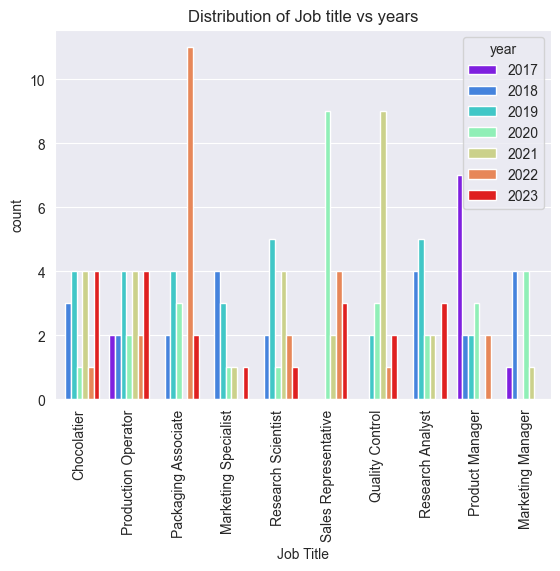

In [28]:
#Distribution of Job title vs years
sns.countplot(x='Job Title', hue='year', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Distribution of Job title vs years')
plt.show()

<Axes: >

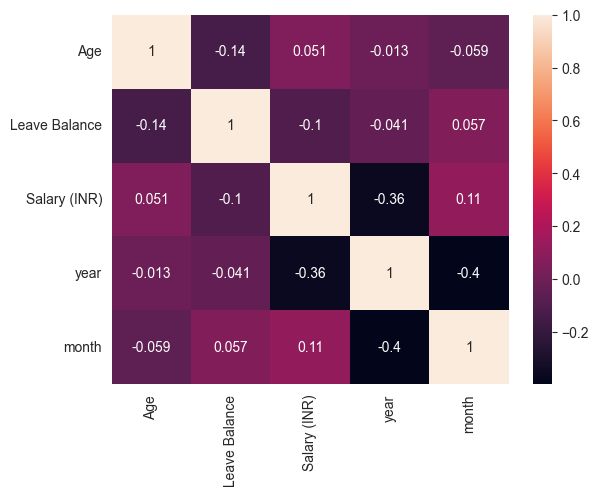

In [29]:
#Correlation between numerical variables
df_corr=df[['Age', 'Leave Balance', 'Salary (INR)','year','month']].dropna().corr()
sns.heatmap(df_corr,annot=True)

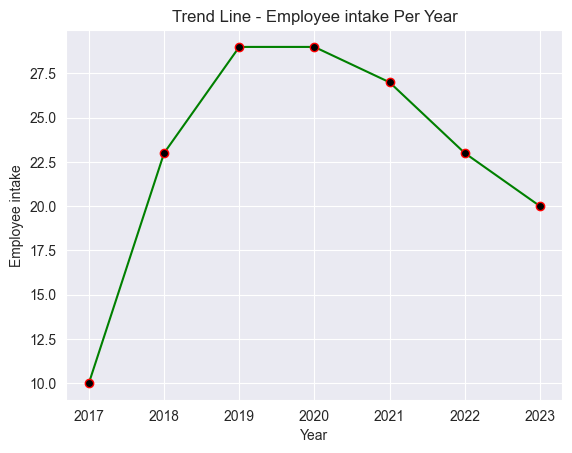

In [30]:
#To analyze the trend of Employee intake per year
sns.set_style("darkgrid")
df['year'].value_counts().sort_index().plot(kind="line", marker="o", color="g", mec="r", mfc="black")
plt.xlabel("Year")
plt.ylabel("Employee intake")
plt.title("Trend Line - Employee intake Per Year")
plt.show()

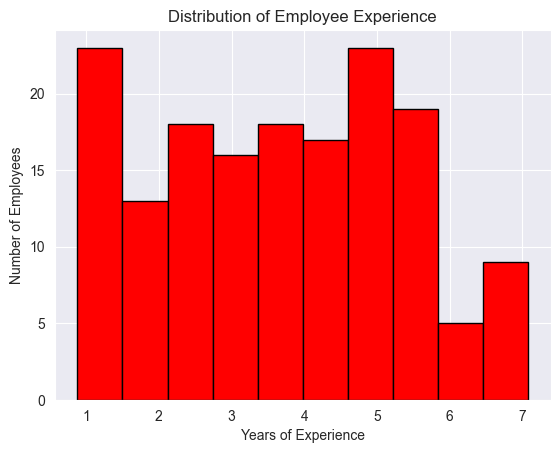

In [32]:
df['Date of Join'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y')
today = datetime.today()
df['Experience'] = (today - df['Date of Join']) / pd.Timedelta(days=365)
#Distribution of experience
plt.hist(df['Experience'], bins=10, edgecolor='black', color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Experience')
plt.show()

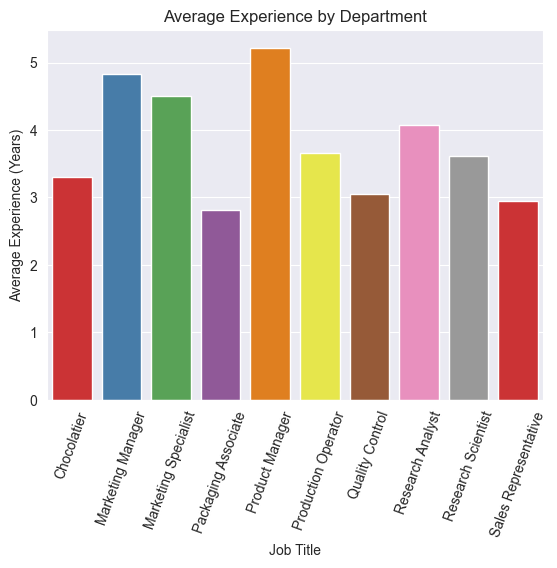

In [33]:
#Average Experience by Department
avg_experience_by_dept = df.groupby('Job Title')['Experience'].mean()
sns.barplot(x=avg_experience_by_dept.index, y=avg_experience_by_dept.values, palette='Set1')
plt.xlabel('Job Title')
plt.ylabel('Average Experience (Years)')
plt.title('Average Experience by Department')
plt.xticks(rotation=70)  
plt.show()

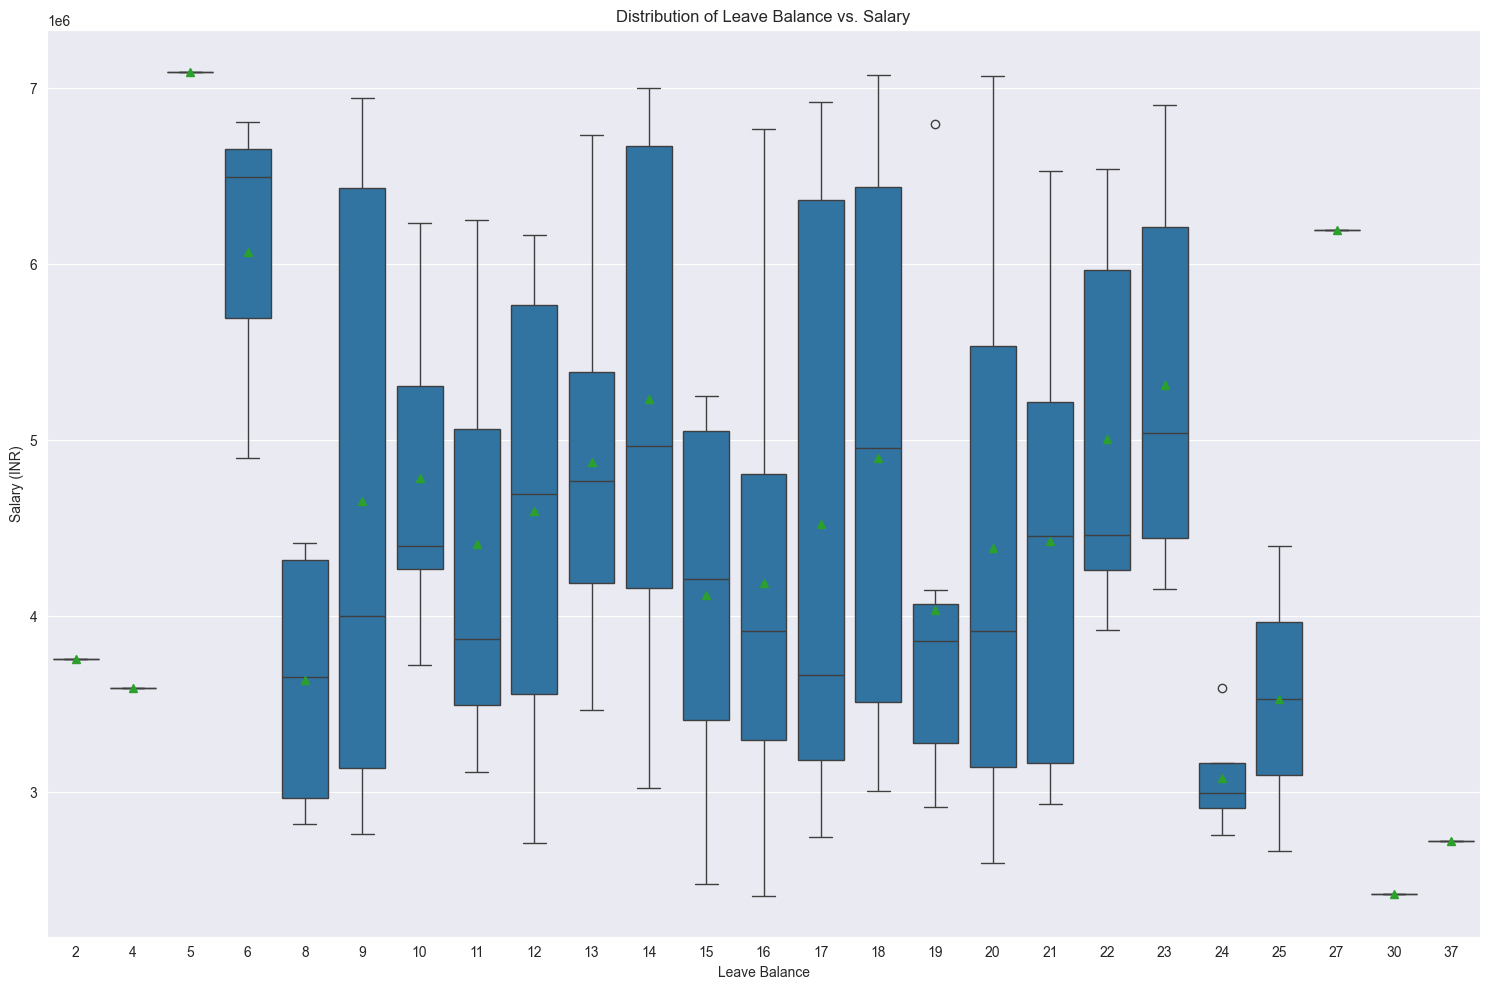

In [192]:
#Distribution of Leave Balance vs. Salary
plt.figure(figsize=(15,10))
sns.boxplot(x = "Leave Balance", y = "Salary (INR)", showmeans=True, data=df)
plt.xlabel("Leave Balance")
plt.ylabel("Salary (INR)")
plt.title("Distribution of Leave Balance vs. Salary") 
plt.tight_layout()
plt.show()